Reflexiones y ampliaciones sobre la base de: 
- *Python Machine Learning 3rd Edition* by [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2019. Code Repository: https://github.com/rasbt/python-machine-learning-book-3rd-edition. Code License: [MIT License](https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/LICENSE.txt).
- *An Introduction to Statistical Learning*,  Gareth James, Daniela Witten, Trevor Hastie, R J Tibshirani, https://www.statlearning.com/

In [2]:
from IPython.display import Image
%matplotlib inline

In [1]:
#pip install mlxtend

# Introducing linear regression

## Linear model equation 

<font color='green'>
The equation of a linear model is defined as: $$ y=w_{0} + w_{1}x$$    

The w represents de 'weights' (parameter of the equation): w0 = y_intercept (ordenada al origen) y w1 slope(curva). 
    
Here w0 is the intercept term—that is, the expected value of Y when X = 0, and w1 is the slope—the average increase in Y associated with a one-unit increase in X.   
    
The goal of the linar model is to lear the 'weights' of the linear equation (*parameters estimates* or *estimate the coefficients*) that best describe the relationship between the explanatory variable and the target variable. These estimates then can be used to predict the responses of new explanatory variables that were not part of training datasets.
</font>

<font color='green'> *In other words, we want to find an intercept β̂0 and a slope β̂1 such that the resulting line is as close as possible to the n = 200 data points* (Introduction to Statistical Learning -forward only ISL- p.76)
</font>

## Simple linear regression

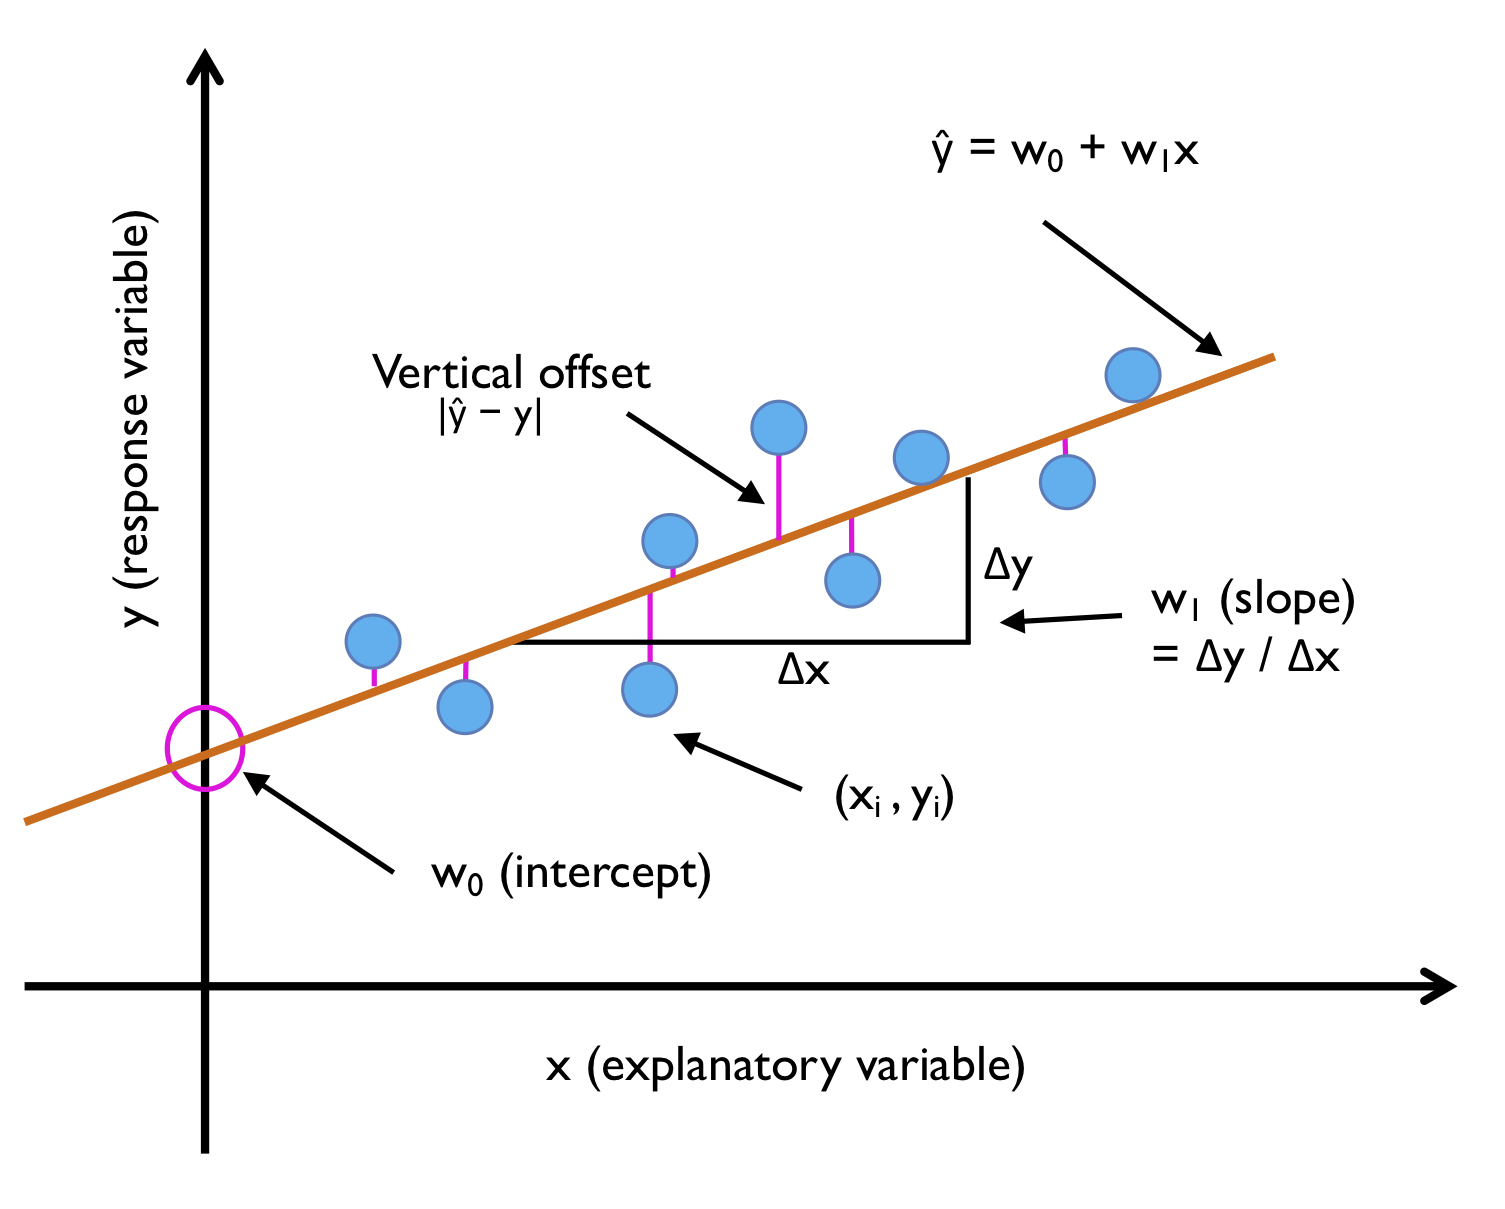

In [3]:
Image(filename='images/10_01.png', width=500) 

<font color='green'>Graphic that represents the goal of the linear regresion model: estimate the best fitting straight line or **regresion line** through the sample data points.</font>

## Optimizacion via minimizar la suma del Cuadrado de Residuos

<font color='green'> Entonces crear un modelo de regresion lineal simple consiste en buscar optimizar los resultados de la ecuación de regresion de tal forma que el valor predicho y' se "acerque" lo máximo posible al valor real y. Esto es, que el valor predicho en base a los datos muestrales se acerque al valor real de los datos poblacionales, que por principio son desconocidos. Esa busqueda por optimizar la función de regresión se traduce en la busqueda por minimizar el error en nuestras predicciones, y para eso, la medida de 'ajuste' más comun considera a la **suma del cuadrado de los residuos* como la métrica de referencia. 
    Dice ISL: Let ŷi = β̂0 + β̂1 xi be the prediction for Y based on the ith value of X. Then ei = yi − ŷi represents the ith residual—this is the difference between residual the ith observed response value and the ith response value that is predicted by our linear model. We define the residual sum of squares (RSS) as     
    $$ RSS = e_{1}^{2} +  e_{2}^{2} +...+  e_{n}^{2} $$

</font>

### Estimador sesgado vs sin sego

<font color='green'> En general decimos que un estimador no está sesgado pues, en promedio, el estimador se acerca al valor real que queremos conocer. Por ejemplo, si estamos estimando la media poblacional en base a la media muestral, decimos que en el caso de un conjunto de observaciones podemos obtener un resultado que sobreestima el valor real, mientras otro conjunto lo subestima. En esa línea con suficientes observaciones podemos pesar que la media de nuestras estimaciones va a coincidir con la media poblacional. Luego, un estimador libre de sesgno (o centrado) calculado sistemáticamente sobre un gran número de observaciones nos dará un valor igual al valor real, sin sobre o subestimación.
</font>

## Evaluar la precisión de los coneficientes (parámetros) estimados

<font color='green'> Un pregunta obvia es ¿qué tan bueno (preciso) es nuestro estimador? o ¿cuán lejos está nuestro valor estimado del valor real?. Para calcular esa diferencia (error) en general se emplea el **error estándar**, cuya formula es: $$Var(\hat{\mu}) = SE(\hat{\mu})^{2} = \frac{\sigma^{2}}{n} $$ En el ámbito de LM podemos evaluar cuándo precisos son nuestros coeficientes estimados apelando error estándar en *w0* y *w1*. 
</font>

## Evaluar la precisión del MRL

<font color='green'> La calidad (precisión) de un modelo de regresión lineal se evalúa con el *error estandar residual* y *R^2*. El error estandar residual no ofrece información sobre *la falta de ajuste* de nuestras predicciones a los datos de entrenamiento. En el caso de R^cuadrado no ofrece información sobre la proporción de variabilidad en Y que es explicada usando X, o sea: un R^cuadrado cercano a 1 indica una larga proporción de variabilidad en la variable de respuesta o target ha sido explicada por la regresión.

</font>

## Multiple linear regression

<font color='green'> The LR with one explanatory variable is colled Simple Linear Regression (SLR). We can generalize the linear equation to multiple explanatory variables as: $$ y = w_{0}x_{0}+ w_{1}x_{1}+...+ w_{m}x_{m} = \sum \limits _{j=0} ^{m} w_{i}x_{1} = w^{T}x $$   
    
</font>




# Análisis preparatorio para implementar un LM

## a. Tiene sentido regresar y = f(x) o hay correlación entre la variable target y la/las pradictoras

<font color='green'> En el contexto de una regresión simple basta con ver el valor de la correlación entre variable dependiente e independiente para contestar sobre la viabilidad de avanzar en el model de regresión, es decir que nuestras estimaciones nos darán información útil sobre y. En el caso de la regresión multiple, que es el escenario normal (multivariable), la pregunta es cuales de los coeficientes son distintos de 0 y por lo tanto aportan información útil para estimar la variable que estamos modelando. A tal fin, además de la ya vista tabla de correlación, un medición general es *F-statistic*, cuyo valor alejado de 1 nos indica que efectivamente entre variables predictoras y target hay correlación.      
</font>

## b. Decidir sobre cuáles variables o atributos incluir en nuestro LM (y cuáles excluir)

<font color='green'> La *selección de varibles* para el modelo es un aspecto importante en su construcción. Podemos pensar que observar lo 'p-values' nos ofrecerá la información que buscamos para elegir las variables con los valores más bajos que serán las más apropiadas para el modelo. En este caso el procedimiento puede ser **Backward selection**: *We start with all variables in the model, and backward remove the variable with the largest p-value—that is, the variable selection that is the least statistically significant. The new (p − 1)-variable model is fit, and the variable with the largest p-value is removed. This procedure continues until a stopping rule is reached. For instance, we may stop when all remaining variables have a p-value below some threshold.*(ISL)</font>

##  c. Qué hacer con variables categóricas

<font color='green'> En caso de corresponderse con un atributo con escala de dos valores, podemos convertirlo a númerico 0 y 1.   </font>

##  d. Otros aspectos interesantes en LM

<font color='green'> El modelo lineal que se expuso tiene dos premisas: que la realación es "aditiva" y "lineal". En el caso de la relación aditiva, el modelo asume que cada variable de manera independiente se relaciona con la variable target, y que entre ellas no hay interacción ('sinergia'), cuando en realidad muchas veces sucede. Por otro lado la idea de linealidad, cuando puede ser perfectamente posible que a medida que cambia x, el efecto de cambio en y deje de ser constante o sea la línea deja de ser recta. En tal caso podemos modelar la relación como *regresión polinómica**  elevando la variable a la potencia de 2, 3, ...Ej: mpg = β0 + β1 × horsepower + β2 × horsepower2 + E. *The quadratic fit appears to be substantially better than the fit obtained when just the linear term is included. The R2 of the quadratic fit is 0.688, compared to 0.606 for the linear fit, and the p-value in Table 3.10 for the quadratic term is highly significant.* (ISL) </font>

# Regresion lineal: train MSE vs test MSE (*mean square prediction error*)

<font color='green'> El *error cuadrático medio* es la métrica estándar para evaluar la bondad de ajuste de nuestro modelo a los datos. Es decir qué tan cerca están los valores que predice nuestro modelo para la variable *target* (o de respuesta) de ciertas observaciones respecto de los valores reales que muestra en las observaciones consideradas. La equación es: $$ MSE = \sum_{i = 1}^{n}{(y_i - \hat{f}(x_i))^2} $$ 

*The MSE will be small if the predicted responses are very close to the true responses, and will be large if for some of the observations, the predicted and true responses differ substantially.*(ISL) El error cuadrático medio se computa en primer lugar utilizando los datos de entrenamiento, por lo que -estrictamente hablando- se denomina: *error cuadrático medio de entrenamiento*. Pero, en un escenario real el error importante es aquél que arroja nuestra set de datos de *testeo*, que fueron datos no empleado al momento de entrenar nuestro modelo.Esto es así pues lo que interesa es predecir (regresar) el valor de la variable objetivo en casos *no vistos* por el modelo, es decir casos a futuro.

En conclusión, queremos elegir el modelo con el menor *error cuadrático medio de testeo (test MSE)* como opuesto al *menor error cuadrático medio de entrenamiento*. Si disponemos de suficientes datos de testeo podemo computar:  $$ Ave(\hat{f}(x_i) - x_0)^2 $$ 

Un aspecto a considerar para elegir el modelo es preferir aquél con el *error cuadrático promedio de predicción* más bajo posible. </font>

# Overfiting, Variance y Bias

<font color='green'> Si se dispone de datos de testeo la elección del mejor modelo es accesible empleando test_MSE. Sin embargo, si no se dispone de datos de testeo, cuál modelo deberíamos elegir? Podríamos pensar que debemos siempre elegir aquél con menor error de entrenamiento. Pues No!. Muchas veces, modelos con buen desempeño en datos de entrenamiento arrojan resultados malos en los datos de testeo.    

Pensemos lo siguiente, supongamos que podemos generar disintas lineas de regresión (a partir de distinos modelos de *f*) logrando además de la *recta de regresión lineal* otras líneas que se ajustan mejor a los  los datos de entrenamiento, siguiendo pendientes curvas. En este caso se dice que las lineas curvas tienen flexibilidad respecto de los datos de entrenamiento, aunque formalmente hablando se trata de *grados de libertad* (cantidad de sintetiza la flexibilidad de la curva de regresión). La recta de regresión lineal tiene baja flexibilidad, presenta 2 grados de libertad. A partir de ahí, a mayor flexibilidad, mayor grados de libertad, mejor ajuste a los datos de entrenamiento, un MSE más bajo. Todos contentos!? NO, pues los buenos resultados en las predicciones de entrenamiento no aseguran buenos resultados en los datos de testeo (o en el mundo real).   

Cuando un modelo arroja un error de entrenamiento bajo pero un los datos de testeo muetra un error alto, decimos que el modelo está *sobreajustado* (*overfitting*) a los datos. Es decir, el modelo está identificando patrones en los datos de entrenamiento que no aparecen en los datos de testeo, y eso bien puede deberse a que los patrones presentes en los datos de entrenamiento no se vinculan a una verdadera relación definida por *f* sino simplemente a variaciones aleatorias.   

Por lo dicho, la sola utilización de MSE no asegura un buen resultado de nuestro modelo. En general la evaluación debe ser más amplia, y la búsqueda del menor test_MSE debe considerar qué modelo minimiza dicho error y al mismo tiempo presenta la menor **varianza** y el menor **sesgo**. Qué significa la menor varianza y sesgo? La varianza alude a la variación que tendremos en *f* (nuestros coeficientes) de repetir el modelo en base a nuevos datos. Si la linea de nuestro modelo sigue una línea recta (no es flexible, tiene grado 2 de libertad) una variación en los datos no va a producir una variación sensible en los coeficientes, sin embargo una linea curva, flexible a los datos, sí lo hará. El sesgo por otro lado se asocia al error que es propio de nuestro modelo al intentar modelar una relación cuyo *f* nos es incognoscible. En líneas generales, modelos más flexibles presetan menor sesgo. 

En conclusión, como regla general, a medida que empleamos modelos más flexibles tendremos un aumento de la varianza y una disminución del sesgo. El ratio entre esas magnitudes establecerá si el MSE aumenta o disminuye. Como son magnitudes relacionadas, en generá la dinámica que presentan sigue la siguiente relacón: a medida que aumentamos la flexibilidad de un modelo el sesgo baja más rápido que el aumento de la varianza. Sin embargo en cierto punto, mayor flexibilidad no ofrece mejoras sustanciales en el sesgo y sí genera aumentos importantes en la varianza, empeorando el MSE. Esta dinámica se reconoce como ***bias-variance trade-off***.</font>

## Loading the Housing dataset into a data frame

Description, which was previously available at: [https://archive.ics.uci.edu/ml/datasets/Housing](https://archive.ics.uci.edu/ml/datasets/Housing)

Attributes:
    
<pre>
1. CRIM      per capita crime rate by town
2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
3. INDUS     proportion of non-retail business acres per town
4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
5. NOX       nitric oxides concentration (parts per 10 million)
6. RM        average number of rooms per dwelling
7. AGE       proportion of owner-occupied units built prior to 1940
8. DIS       weighted distances to five Boston employment centres
9. RAD       index of accessibility to radial highways
10. TAX      full-value property-tax rate per $10,000
11. PTRATIO  pupil-teacher ratio by town
12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
13. LSTAT    % lower status of the population
14. MEDV     Median value of owner-occupied homes in $1000s
</pre>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os

In [3]:
os.listdir()

['README.md',
 'regresion_lineal_intro.ipynb',
 'data',
 'utn_machine_learning',
 '.ipynb_checkpoints',
 '.git',
 '.idea',
 'primer_paso.py']

El dataset tiene 506 registros, de 13 dimensiones


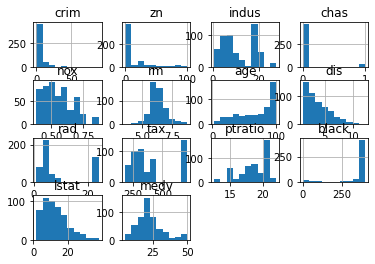

In [6]:
#%% Cargar dataset

df = pd.read_csv("data/boston.csv")
x = df.drop('medv', axis=1)
y = df['medv']
n,d = x.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

# visualizar distribución de los features
df.hist();

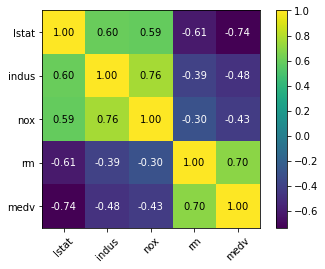

In [7]:
import numpy as np
from mlxtend.plotting import heatmap
cols = ['lstat', 'indus', 'nox', 'rm','medv']
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)

# plt.savefig('images/10_04.png', dpi=300)
plt.show()

In [8]:
#%% Normalizar los datos
NORMALIZAR = 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x)  
    x = scaler.transform(x)
    
#%% Entrenar modelo de Regresión Lineal
# crea el objeto modelo
modelo= LinearRegression()

#%% entrena
modelo.fit(x, y)
# predice
y_predict= modelo.predict(x)
#coeficientes (parámetros del modelo)
w= modelo.coef_
b= modelo.intercept_

# scores
mse_error= mean_squared_error(y_predict, y)
print("Error cuad. medio: %.2f" % mse_error)
mae_error= mean_absolute_error(y_predict, y)
print("Error abs. medio: %.2f" % mae_error)
r2_score= r2_score(y, y_predict)
print("r2_score: %.2f" % r2_score)



Error cuad. medio: 21.89
Error abs. medio: 3.27
r2_score: 0.74


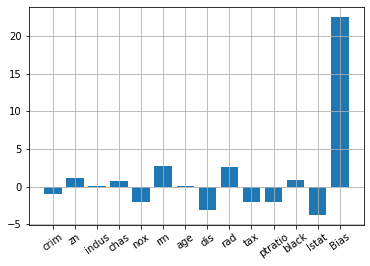

In [9]:
#%% plot coeficientes
plt.figure()
plt.bar(range(d+1), np.concatenate((w,[b])))
labels= data.columns.values; labels[-1]= 'Bias'
plt.xticks(range(w.shape[0]+1), labels, rotation=35)
plt.grid()


(Text(0.5, 0, 'valores reales'), Text(0, 0.5, 'Valores predichos'))

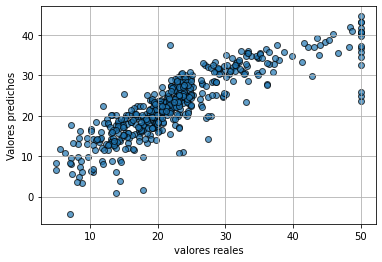

In [10]:
#%% Plot valores esperados vs valores predichos
plt.figure()
plt.scatter(y, y_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.xlabel("valores reales"), plt.ylabel("Valores predichos")

# From here the material is a copy of

## Solving regression for regression parameters with gradient descent

In [11]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [12]:
X = df[['rm']].values
y = df['medv'].values

In [13]:
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [14]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

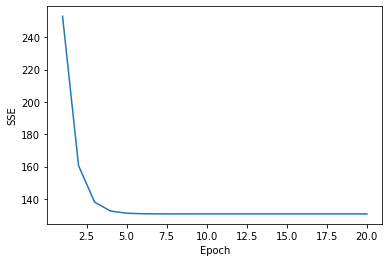

In [15]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
#plt.tight_layout()
#plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [16]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return 

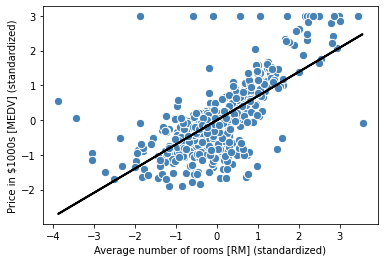

In [17]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')

#plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [16]:
print('Slope: %.3f' % lr.w_[1])
print('Intercept: %.3f' % lr.w_[0])

Slope: 0.695
Intercept: -0.000


In [17]:
num_rooms_std = sc_x.transform(np.array([[5.0]]))
price_std = lr.predict(num_rooms_std)
print("Price in $1000s: %.3f" % sc_y.inverse_transform(price_std))

Price in $1000s: 10.840


## Estimating the coefficient of a regression model via scikit-learn

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 9.102
Intercept: -34.671


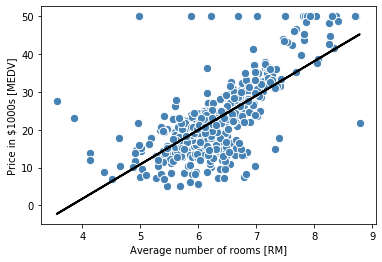

In [20]:
lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')

#plt.savefig('images/10_07.png', dpi=300)
plt.show()

**Normal Equations** alternative:

In [21]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print('Slope: %.3f' % w[1])
print('Intercept: %.3f' % w[0])

Slope: 9.102
Intercept: -34.671


# Fitting a robust regression model using RANSAC

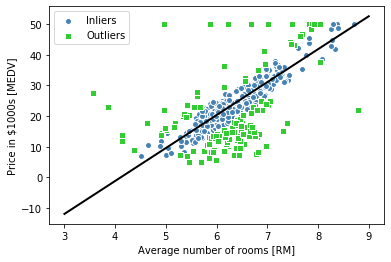

In [22]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_loss', 
                         residual_threshold=5.0, 
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)   
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')

#plt.savefig('images/10_08.png', dpi=300)
plt.show()

In [23]:
print('Slope: %.3f' % ransac.estimator_.coef_[0])
print('Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


# Evaluating the performance of linear regression models

In [18]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['medv'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [19]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [20]:
import numpy as np
import scipy as sp

ary = np.array(range(100000))

In [21]:
%timeit np.linalg.norm(ary)

68.1 µs ± 12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [28]:
%timeit sp.linalg.norm(ary)

57.7 µs ± 1.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%timeit np.sqrt(np.sum(ary**2))

72.3 µs ± 2.39 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


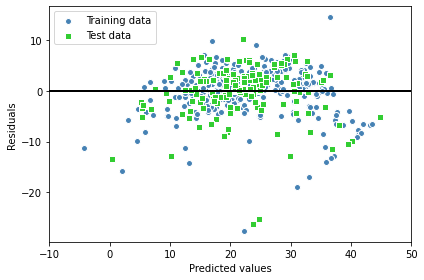

In [22]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [31]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 19.958, test: 27.196
R^2 train: 0.765, test: 0.673


# Using regularized methods for regression

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.11311792  0.04725111 -0.03992527  0.96478874 -0.          3.72289616
 -0.02143106 -1.23370405  0.20469    -0.0129439  -0.85269025  0.00795847
 -0.52392362]


In [33]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 20.926, test: 28.876
R^2 train: 0.753, test: 0.653


Ridge regression:

In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

LASSO regression:

In [35]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

Elastic Net regression:

In [36]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Turning a linear regression model into a curve - polynomial regression

In [37]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [38]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

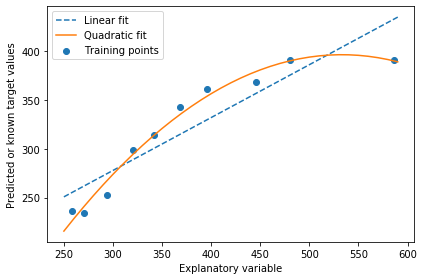

In [39]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/10_11.png', dpi=300)
plt.show()

In [40]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [41]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


## Modeling nonlinear relationships in the Housing Dataset

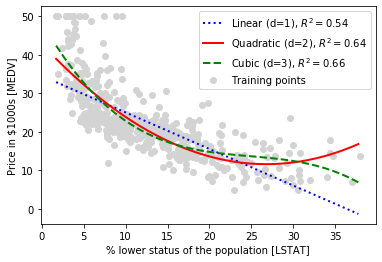

In [42]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

#plt.savefig('images/10_12.png', dpi=300)
plt.show()

Transforming the dataset:

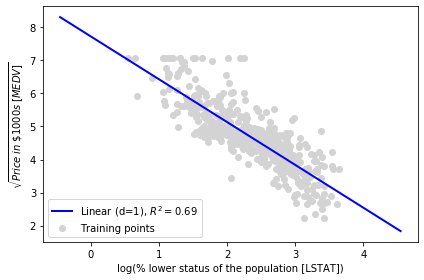

In [43]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
#plt.savefig('images/10_13.png', dpi=300)
plt.show()

# Dealing with nonlinear relationships using random forests

## Decision tree regression

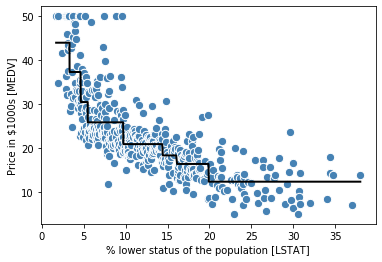

In [44]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
#plt.savefig('images/10_14.png', dpi=300)
plt.show()

## Random forest regression

In [45]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [46]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.641, test: 11.056
R^2 train: 0.979, test: 0.878


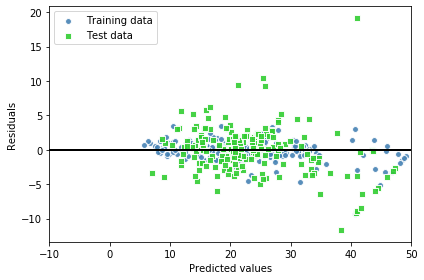

In [47]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

#plt.savefig('images/10_15.png', dpi=300)
plt.show()